In [2]:
! pip install hmmlearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import itertools
from sklearn.cluster import KMeans
from hmmlearn import hmm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MultiLabelBinarizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
data = pd.read_csv(r'/content/dataset_B_05_2020 (1).csv')
x = data.drop(columns=['url', 'status']).values
y = data.iloc[:, -1].values
y = y.reshape(-1, 1)
encoder1 = MultiLabelBinarizer()
encoder2 = OrdinalEncoder()
# transform data
y = encoder2.fit_transform(y)
x = encoder1.fit_transform(x)
print(x)
#sc = StandardScaler()
#x = sc.fit_transform(x)
#y = sc.fit(y)

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [4]:
# Implementation of the markov model
markov = hmm.GaussianHMM(n_components = 2, covariance_type = "diag", n_iter = 10, random_state = 42)
markov.fit(x)

GaussianHMM(n_components=2, random_state=42)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [9]:
#SVM MODEL

model_svm = SVC(random_state=1)
model_svm.fit(x_train, y_train)
y_pred_svm = model_svm.predict(x_test)
print(classification_report(y_test, y_pred_svm))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85      1747
         1.0       0.83      0.86      0.85      1682

    accuracy                           0.85      3429
   macro avg       0.85      0.85      0.85      3429
weighted avg       0.85      0.85      0.85      3429



0.8454359871682706

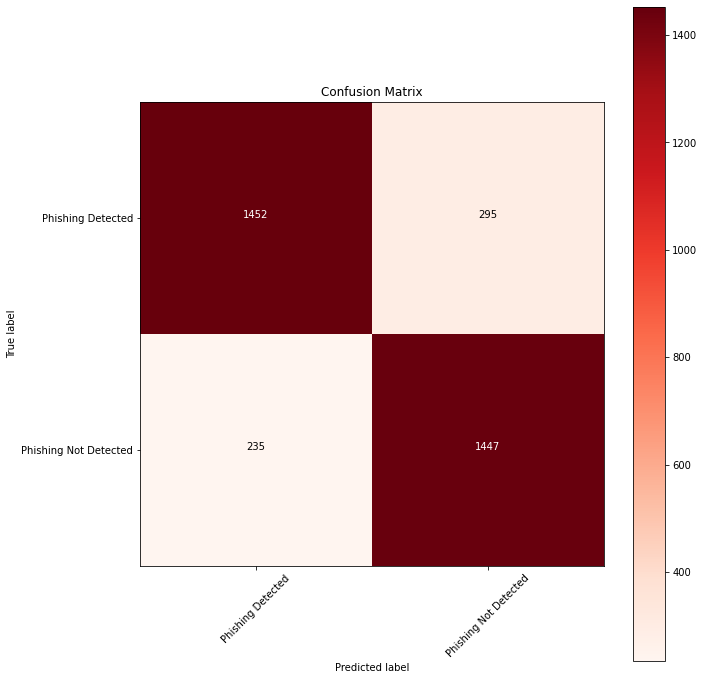

In [10]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(y_test, y_pred_svm)
target_names = ["Phishing Detected", "Phishing Not Detected"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(y_test, y_pred_svm)

In [11]:
#KNN model

model_KNN = KNeighborsClassifier()
model_KNN.fit(x_train, y_train)
y_pred_KNN = model_KNN.predict(x_test)
print(classification_report(y_test, y_pred_KNN))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

         0.0       0.87      0.23      0.36      1747
         1.0       0.55      0.97      0.70      1682

    accuracy                           0.59      3429
   macro avg       0.71      0.60      0.53      3429
weighted avg       0.71      0.59      0.53      3429



0.5905511811023622

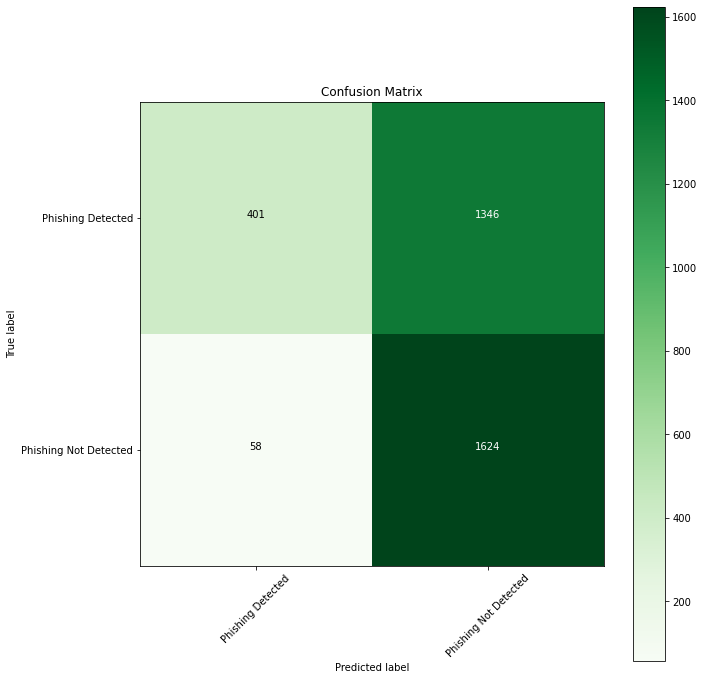

In [12]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Greens):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(y_test, y_pred_KNN)
target_names = ["Phishing Detected", "Phishing Not Detected"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(y_test, y_pred_KNN)